<a href="https://colab.research.google.com/github/VishalGaurav1/Predicting-Driver-s-attrition/blob/main/Pred_attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! gdown --id 1zTxoojk8DBEgrDhqmjKNBSWSS2Mm4cIt

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1zTxoojk8DBEgrDhqmjKNBSWSS2Mm4cIt
To: /content/olla.csv
100% 1.14M/1.14M [00:00<00:00, 130MB/s]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ola=pd.read_csv('olla.csv')
ola.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,1/1/2019,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,2/1/2019,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,3/1/2019,1,28.0,0.0,C23,2,57387,24/12/18,3/11/2019,1,1,0,2
3,3,11/1/2020,2,31.0,0.0,C7,2,67016,11/6/2020,NaN,2,2,0,1
4,4,12/1/2020,2,31.0,0.0,C7,2,67016,11/6/2020,NaN,2,2,0,1


In [4]:
ola=ola.iloc[:,1:]
ola.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1/1/2019,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,2/1/2019,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,3/1/2019,1,28.0,0.0,C23,2,57387,24/12/18,3/11/2019,1,1,0,2
3,11/1/2020,2,31.0,0.0,C7,2,67016,11/6/2020,NaN,2,2,0,1
4,12/1/2020,2,31.0,0.0,C7,2,67016,11/6/2020,NaN,2,2,0,1


In [5]:
ola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [6]:
(ola.isnull().sum()/ola.shape[0])*100

MMM-YY                   0.000000
Driver_ID                0.000000
Age                      0.319305
Gender                   0.272194
City                     0.000000
Education_Level          0.000000
Income                   0.000000
Dateofjoining            0.000000
LastWorkingDate         91.541039
Joining Designation      0.000000
Grade                    0.000000
Total Business Value     0.000000
Quarterly Rating         0.000000
dtype: float64

In [7]:
ola.columns

Index(['MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


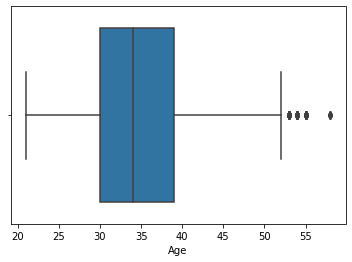

In [8]:
sns.boxplot(ola['Age'])
plt.show()

In [9]:
ola['Age'].fillna(ola['Age'].median(),inplace=True)

In [10]:
ola['Gender'].value_counts(normalize=True)

0.0    0.581251
1.0    0.418749
Name: Gender, dtype: float64

In [11]:
ola['Gender'].fillna(0,inplace=True)
ola['Gender'].value_counts(normalize=True)

0.0    0.582391
1.0    0.417609
Name: Gender, dtype: float64

In [12]:
ola.isnull().sum()

MMM-YY                      0
Driver_ID                   0
Age                         0
Gender                      0
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [13]:
cols=['MMM-YY','Dateofjoining','LastWorkingDate']
for i in cols:
    ola[i]=pd.to_datetime(ola[i])
ola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19104 non-null  float64       
 3   Gender                19104 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

In [14]:
ola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19104 non-null  float64       
 3   Gender                19104 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

In [15]:
ola.nunique()

MMM-YY                     24
Driver_ID                2381
Age                        36
Gender                      2
City                       29
Education_Level             3
Income                   2383
Dateofjoining             869
LastWorkingDate           493
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
dtype: int64

In [16]:
ola.drop_duplicates(inplace=True)
ola.shape

(19104, 13)

In [17]:
#last 3 months average income for the drivers
ola['row_num']=ola.groupby('Driver_ID')['MMM-YY'].rank(method='first',ascending=False)
ola[['MMM-YY','Driver_ID','Income','row_num']]

,MMM-YY,Driver_ID,Income,row_num
0,2019-01-01,1,57387,3.0
1,2019-02-01,1,57387,2.0
2,2019-03-01,1,57387,1.0
3,2020-11-01,2,67016,2.0
4,2020-12-01,2,67016,1.0
...,...,...,...,...
19099,2020-08-01,2788,70254,5.0
19100,2020-09-01,2788,70254,4.0
19101,2020-10-01,2788,70254,3.0
19102,2020-11-01,2788,70254,2.0


In [18]:
df=ola[ola['row_num']<=3]
df

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,row_num
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,3.0
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,2.0
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,1.0
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,2.0
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19095,2019-05-01,2787,28.0,1.0,C20,2,69498,2018-07-21,NaT,1,1,0,1,2.0
19096,2019-06-01,2787,28.0,1.0,C20,2,69498,2018-07-21,2019-06-20,1,1,0,1,1.0
19101,2020-10-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,0,2,3.0
19102,2020-11-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,200420,2,2.0


In [19]:
df1=df.groupby('Driver_ID')['Income'].mean().reset_index(name='avg_inc')
df1

,Driver_ID,avg_inc
0,1,57387.0
1,2,67016.0
2,4,65603.0
3,5,46368.0
4,6,78728.0
...,...,...
2376,2784,82815.0
2377,2785,12105.0
2378,2786,35370.0
2379,2787,69498.0


In [20]:
ola=pd.merge(ola,df1,on='Driver_ID',how='inner')
ola[['Driver_ID','Income','avg_inc']]

,Driver_ID,Income,avg_inc
0,1,57387,57387.0
1,1,57387,57387.0
2,1,57387,57387.0
3,2,67016,67016.0
4,2,67016,67016.0
...,...,...,...
19099,2788,70254,70254.0
19100,2788,70254,70254.0
19101,2788,70254,70254.0
19102,2788,70254,70254.0


In [21]:
#last 3 months average grade for the drivers
df2=df.groupby('Driver_ID')['Grade'].mean().reset_index(name='avg_grade')
ola=pd.merge(ola,df2,on='Driver_ID',how='inner')
ola[['Driver_ID','Income','avg_inc','Grade','avg_grade']]

,Driver_ID,Income,avg_inc,Grade,avg_grade
0,1,57387,57387.0,1,1.0
1,1,57387,57387.0,1,1.0
2,1,57387,57387.0,1,1.0
3,2,67016,67016.0,2,2.0
4,2,67016,67016.0,2,2.0
...,...,...,...,...,...
19099,2788,70254,70254.0,2,2.0
19100,2788,70254,70254.0,2,2.0
19101,2788,70254,70254.0,2,2.0
19102,2788,70254,70254.0,2,2.0


In [22]:
#last 3 months average business value for the drivers
df3=df.groupby('Driver_ID')['Total Business Value'].mean().reset_index(name='avg_business_val')
ola=pd.merge(ola,df3,on='Driver_ID',how='inner')
ola[['Driver_ID','Income','avg_inc','Grade','avg_grade','Total Business Value','avg_business_val']]

,Driver_ID,Income,avg_inc,Grade,avg_grade,Total Business Value,avg_business_val
0,1,57387,57387.0,1,1.0,2381060,571860.000000
1,1,57387,57387.0,1,1.0,-665480,571860.000000
2,1,57387,57387.0,1,1.0,0,571860.000000
3,2,67016,67016.0,2,2.0,0,0.000000
4,2,67016,67016.0,2,2.0,0,0.000000
...,...,...,...,...,...,...,...
19099,2788,70254,70254.0,2,2.0,740280,203966.666667
19100,2788,70254,70254.0,2,2.0,448370,203966.666667
19101,2788,70254,70254.0,2,2.0,0,203966.666667
19102,2788,70254,70254.0,2,2.0,200420,203966.666667


In [23]:
ola1=ola[ola['row_num']==1]
ola1.shape

(2381, 17)

In [24]:
ola1.fillna(0,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [25]:
ola1['target_var']=list(map(lambda x:1 if x!=0 else x,ola1['LastWorkingDate']))
ola1[['LastWorkingDate','target_var']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,LastWorkingDate,target_var
2,2019-03-11 00:00:00,1
4,0,0
9,2020-04-27 00:00:00,1
12,2019-03-07 00:00:00,1
17,0,0
...,...,...
19078,0,0
19081,2020-10-28 00:00:00,1
19090,2019-09-22 00:00:00,1
19096,2019-06-20 00:00:00,1


In [26]:
ola1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 2 to 19103
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                2381 non-null   datetime64[ns]
 1   Driver_ID             2381 non-null   int64         
 2   Age                   2381 non-null   float64       
 3   Gender                2381 non-null   float64       
 4   City                  2381 non-null   object        
 5   Education_Level       2381 non-null   int64         
 6   Income                2381 non-null   int64         
 7   Dateofjoining         2381 non-null   datetime64[ns]
 8   LastWorkingDate       2381 non-null   object        
 9   Joining Designation   2381 non-null   int64         
 10  Grade                 2381 non-null   int64         
 11  Total Business Value  2381 non-null   int64         
 12  Quarterly Rating      2381 non-null   int64         
 13  row_num          

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


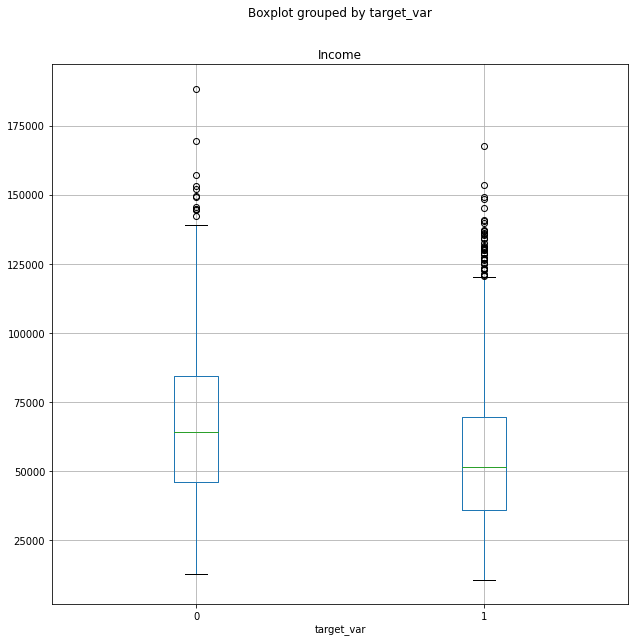

In [27]:
ola1.boxplot(by='target_var',column='Income',figsize=(10,10))
plt.show()

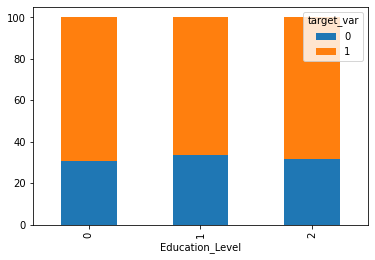

In [28]:
df=(ola1.groupby(['target_var','Education_Level']).size()*100/ola1.groupby('Education_Level').size()).reset_index(name='percent')
df.pivot(index='Education_Level',columns='target_var',values='percent').plot.bar(stacked=True)

In [29]:
ola1['Gender'].value_counts(normalize=True)

0.0    0.591348
1.0    0.408652
Name: Gender, dtype: float64

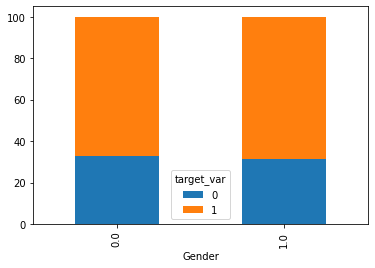

In [30]:
df=(ola1.groupby(['target_var','Gender']).size()*100/ola1.groupby('Gender').size()).reset_index(name='percent')
df.pivot(index='Gender',columns='target_var',values='percent').plot.bar(stacked=True)

In [31]:
xs=ola1[[ 'Age', 'Gender', 'City', 'Education_Level','Joining Designation','Quarterly Rating',
         'avg_inc', 'avg_grade', 'avg_business_val']]

In [32]:
y=ola1['target_var']

In [33]:
xs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 2 to 19103
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2381 non-null   float64
 1   Gender               2381 non-null   float64
 2   City                 2381 non-null   object 
 3   Education_Level      2381 non-null   int64  
 4   Joining Designation  2381 non-null   int64  
 5   Quarterly Rating     2381 non-null   int64  
 6   avg_inc              2381 non-null   float64
 7   avg_grade            2381 non-null   float64
 8   avg_business_val     2381 non-null   float64
dtypes: float64(5), int64(3), object(1)
memory usage: 186.0+ KB


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_trainn,x_test,y_trainn,y_test=train_test_split(xs,y,test_size=0.15,random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x_trainn,y_trainn,test_size=0.15,random_state=42)

In [36]:
print(x_train.shape,x_val.shape,x_test.shape,y_train.shape,
     y_val.shape,y_test.shape)

(1719, 9) (304, 9) (358, 9) (1719,) (304,) (358,)


In [37]:
pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 2.8 MB/s 


In [38]:
import category_encoders as ce

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [39]:
xs.columns

Index(['Age', 'Gender', 'City', 'Education_Level', 'Joining Designation',
       'Quarterly Rating', 'avg_inc', 'avg_grade', 'avg_business_val'],
      dtype='object')

Performing target encoding on City

In [40]:
ce_target=ce.TargetEncoder(cols=['City'])
x_train=ce_target.fit_transform(x_train,y_train)
x_val=ce_target.transform(x_val)
x_test=ce_target.transform(x_test)

/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [41]:
x_train

,Age,Gender,City,Education_Level,Joining Designation,Quarterly Rating,avg_inc,avg_grade,avg_business_val
18587,35.0,1.0,0.688679,2,1,1,61569.0,1.0,1.527500e+05
4231,23.0,1.0,0.725806,1,1,1,36474.0,1.0,0.000000e+00
762,52.0,0.0,0.867925,1,2,1,73769.0,3.0,1.561500e+05
7726,31.0,0.0,0.634921,2,1,1,57356.0,1.0,0.000000e+00
972,38.0,0.0,0.728814,1,1,3,72253.0,2.0,6.405467e+05
...,...,...,...,...,...,...,...,...,...
659,29.0,1.0,0.741379,2,3,1,60874.0,3.0,0.000000e+00
6474,38.0,0.0,0.685185,0,3,1,83350.0,3.0,0.000000e+00
17900,31.0,0.0,0.513889,2,1,3,98935.0,4.0,1.774063e+06
8776,37.0,0.0,0.703704,2,1,2,39644.0,1.0,5.278600e+05


Standardization of the features

In [42]:
cols=['Age', 'Education_Level', 'Joining Designation',
       'Quarterly Rating', 'avg_inc', 'avg_grade', 'avg_business_val']
d={}
for i in cols:
    mean_i=x_train[i].mean()
    std_i=x_train[i].std()
    x_train[i]=(x_train[i]-mean_i)/std_i
    d[i]=[mean_i,std_i]
x_train

,Age,Gender,City,Education_Level,Joining Designation,Quarterly Rating,avg_inc,avg_grade,avg_business_val
18587,0.197399,1.0,0.688679,1.240928,-0.993330,-0.537095,0.065654,-1.179972,-0.209497
4231,-1.821419,1.0,0.725806,0.014272,-0.993330,-0.537095,-0.812298,-1.179972,-0.462201
762,3.057392,0.0,0.867925,0.014272,0.188355,-0.537095,0.492472,0.943977,-0.203872
7726,-0.475540,0.0,0.634921,1.240928,-0.993330,-0.537095,-0.081739,-1.179972,-0.462201
972,0.702104,0.0,0.728814,0.014272,-0.993330,1.797333,0.439435,-0.117997,0.597496
...,...,...,...,...,...,...,...,...,...
659,-0.812010,1.0,0.741379,1.240928,1.370039,-0.537095,0.041339,0.943977,-0.462201
6474,0.702104,0.0,0.685185,-1.212384,1.370039,-0.537095,0.827664,0.943977,-0.462201
17900,-0.475540,0.0,0.513889,1.240928,-0.993330,1.797333,1.372907,2.005952,2.472744
8776,0.533869,0.0,0.703704,1.240928,-0.993330,0.630119,-0.701395,-1.179972,0.411071


In [43]:
for i in cols:
  x_val[i]=(x_val[i]-d[i][0])/d[i][1]
  x_test[i]=(x_test[i]-d[i][0])/d[i][1]
x_test

,Age,Gender,City,Education_Level,Joining Designation,Quarterly Rating,avg_inc,avg_grade,avg_business_val
11171,0.365634,0.0,0.655172,1.240928,0.188355,-0.537095,-0.007395,-0.117997,-0.462201
8558,-1.148479,1.0,0.533333,1.240928,-0.993330,-0.537095,0.618418,0.943977,0.355430
10838,-0.812010,0.0,0.703704,0.014272,0.188355,-0.537095,-0.094718,-0.117997,-0.462201
15832,-0.475540,0.0,0.655172,1.240928,-0.993330,-0.537095,-0.999468,-1.179972,-0.462201
8826,0.197399,0.0,0.533333,1.240928,-0.993330,-0.537095,-0.695133,-1.179972,-0.462201
...,...,...,...,...,...,...,...,...,...
16312,-0.475540,0.0,0.671233,0.014272,-0.993330,-0.537095,-1.470928,-1.179972,-0.462201
13642,-0.307305,1.0,0.614035,-1.212384,0.188355,-0.537095,-0.591717,-0.117997,-0.462201
6586,0.197399,0.0,0.725806,0.014272,1.370039,-0.537095,0.038645,0.943977,-0.462201
1330,1.711513,0.0,0.741379,0.014272,1.370039,0.630119,0.535574,0.943977,0.089254


In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
from sklearn import metrics

Making a LogisticRegression Model

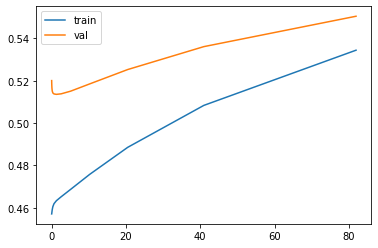

In [46]:
train_cost=[]
val_cost=[]
lambdaa=[]
l=0.01
while l<=100:
  lambdaa.append(l)
  model=LogisticRegression(C=1/l,class_weight={0:0.1,1:0.1},max_iter=100)
  model.fit(x_train,y_train)
  y_train_probs=model.predict_proba(x_train)
  y_val_probs=model.predict_proba(x_val)
  train_loss=metrics.log_loss(y_train,y_train_probs)
  val_loss=metrics.log_loss(y_val,y_val_probs)
  train_cost.append(train_loss)
  val_cost.append(val_loss)
  l*=2
plt.plot(lambdaa,train_cost,label='train')
plt.plot(lambdaa,val_cost,label='val')
plt.legend()
plt.show()


In [47]:
z=np.argmin(val_cost)
lbest=0.01*(2**z)
lbest

1.28

In [48]:
model=LogisticRegression(C=1/lbest,class_weight={0:0.1,1:0.1},max_iter=100)
model.fit(x_train,y_train)
print(model.score(x_train,y_train))
print(model.score(x_val,y_val))
print(model.score(x_test,y_test))


0.8091913903432228
0.7861842105263158
0.7877094972067039


In [49]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
ypred=model.predict(x_test)
confusion_matrix(y_test,ypred)

array([[ 51,  58],
       [ 18, 231]])

In [50]:
print(precision_score(y_test,ypred))
print(recall_score(y_test,ypred))

0.7993079584775087
0.927710843373494


In [51]:
y_pred = model.predict_proba(x_test)

In [52]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)
roc_auc

0.774179285951144

DecisionTreeClassifier

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
x_trainn,x_test,y_trainn,y_test=train_test_split(xs,y,test_size=0.15,random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x_trainn,y_trainn,test_size=0.15,random_state=42)

In [55]:
print(x_train.shape,x_val.shape,x_test.shape,y_train.shape,
     y_val.shape,y_test.shape)

(1719, 9) (304, 9) (358, 9) (1719,) (304,) (358,)


In [56]:
ce_target=ce.TargetEncoder(cols=['City'])
x_train=ce_target.fit_transform(x_train,y_train)
x_val=ce_target.transform(x_val)
x_test=ce_target.transform(x_test)

/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [57]:
x_train

,Age,Gender,City,Education_Level,Joining Designation,Quarterly Rating,avg_inc,avg_grade,avg_business_val
18587,35.0,1.0,0.688679,2,1,1,61569.0,1.0,1.527500e+05
4231,23.0,1.0,0.725806,1,1,1,36474.0,1.0,0.000000e+00
762,52.0,0.0,0.867925,1,2,1,73769.0,3.0,1.561500e+05
7726,31.0,0.0,0.634921,2,1,1,57356.0,1.0,0.000000e+00
972,38.0,0.0,0.728814,1,1,3,72253.0,2.0,6.405467e+05
...,...,...,...,...,...,...,...,...,...
659,29.0,1.0,0.741379,2,3,1,60874.0,3.0,0.000000e+00
6474,38.0,0.0,0.685185,0,3,1,83350.0,3.0,0.000000e+00
17900,31.0,0.0,0.513889,2,1,3,98935.0,4.0,1.774063e+06
8776,37.0,0.0,0.703704,2,1,2,39644.0,1.0,5.278600e+05


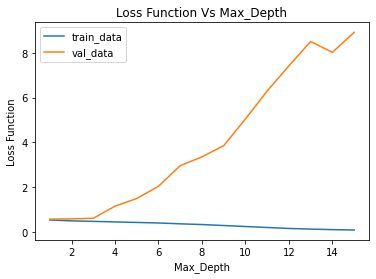

In [58]:

train_cost=[]
val_cost=[]
depth=1
maxdepth=[]
while depth<=15:
    model=DecisionTreeClassifier(random_state=0,max_depth=depth,class_weight={0:0.1,1:0.2})
    model.fit(x_train,y_train)
    y_train_probs=model.predict_proba(x_train)
    y_val_probs=model.predict_proba(x_val)
    train_loss=metrics.log_loss(y_train,y_train_probs)
    val_loss=metrics.log_loss(y_val,y_val_probs)
    train_cost.append(train_loss)
    val_cost.append(val_loss)
    maxdepth.append(depth)
    depth+=1
plt.plot(maxdepth,train_cost,label='train_data')
plt.plot(maxdepth,val_cost,label='val_data')
plt.xlabel('Max_Depth')
plt.ylabel('Loss Function')
plt.title('Loss Function Vs Max_Depth')
plt.legend()
plt.show()

In [59]:
model=DecisionTreeClassifier(max_depth=2,class_weight={0:0.1,1:0.2})
model.fit(x_train,y_train)
print(model.score(x_train,y_train))
print(model.score(x_val,y_val))
print(model.score(x_test,y_test))

0.8033740546829552
0.7664473684210527
0.7821229050279329


In [60]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
ypred=model.predict(x_test)
confusion_matrix(y_test,ypred)

array([[ 47,  62],
       [ 16, 233]])

In [61]:
print(precision_score(y_test,ypred))
print(recall_score(y_test,ypred))

0.7898305084745763
0.9357429718875502


In [62]:
y_score=model.predict_proba(x_test)
fpr,tpr,threshold=roc_curve(y_test,y_score[:,1])
auc(fpr,tpr)

0.758446630558933

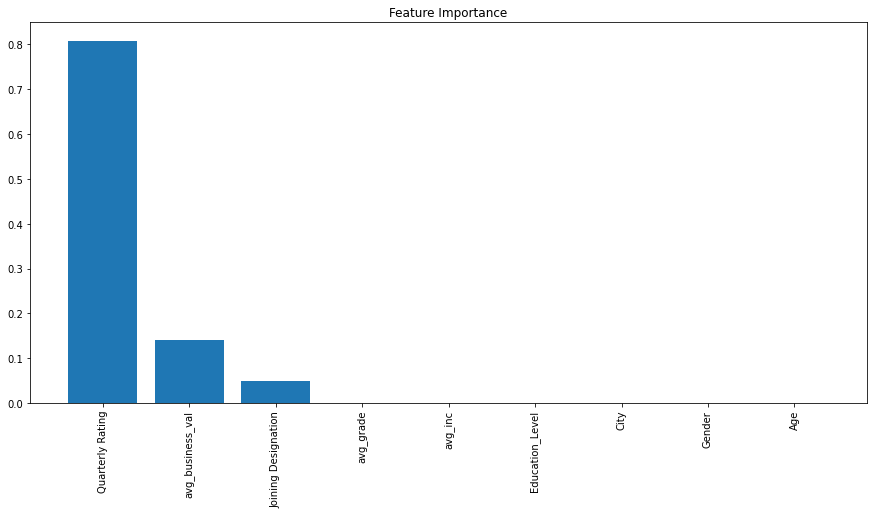

In [63]:
# Feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1] 
names = [x_train.columns[i] for i in indices] 
plt.figure(figsize=(15, 7)) 
plt.title("Feature Importance") 
plt.bar(range(x_train.shape[1]), importances[indices]) 
plt.xticks(range(x_train.shape[1]), names, rotation=90)
plt.show()

RandomForestClassifier

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train,x_test,y_train,y_test=train_test_split(xs,y,test_size=0.15,random_state=42)

In [66]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(2023, 9) (358, 9) (2023,) (358,)


In [67]:
ce_target=ce.TargetEncoder(cols=['City'])
x_train=ce_target.fit_transform(x_train,y_train)
x_val=ce_target.transform(x_val)
x_test=ce_target.transform(x_test)

/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [68]:
x_train

,Age,Gender,City,Education_Level,Joining Designation,Quarterly Rating,avg_inc,avg_grade,avg_business_val
17031,23.0,1.0,0.716418,1,1,4,43876.0,1.0,807186.666667
9598,26.0,0.0,0.626667,0,1,1,37613.0,1.0,221440.000000
15855,40.0,0.0,0.710145,1,2,1,59097.0,2.0,200000.000000
1702,24.0,0.0,0.716418,0,1,1,19170.0,1.0,96500.000000
4648,27.0,1.0,0.739130,0,3,1,79461.0,3.0,0.000000
...,...,...,...,...,...,...,...,...,...
12971,27.0,0.0,0.661538,1,2,1,63402.0,2.0,0.000000
8753,26.0,1.0,0.716667,1,1,1,52789.0,1.0,104843.333333
9008,39.0,1.0,0.716667,1,1,1,17493.0,1.0,0.000000
10216,31.0,0.0,0.709924,1,1,1,31401.0,1.0,0.000000


In [69]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import KFold,cross_validate

In [70]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [71]:
rf_model=RandomForestClassifier(random_state=1,class_weight={0:0.1,1:0.2})
fold=KFold(n_splits=5)
params={'n_estimators':[51,71,101],
        'max_depth':[5,8,12,15,20],
        'max_samples':[0.60,0.80],
        'max_features':[0.60,0.80]}

In [72]:
clf=RandomizedSearchCV(rf_model,params,cv=fold,scoring='roc_auc',n_jobs=-1)

In [73]:
clf.fit(x_train,y_train)


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(class_weight={0: 0.1,
                                                                  1: 0.2},
                                                    random_state=1),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 8, 12, 15, 20],
                                        'max_features': [0.6, 0.8],
                                        'max_samples': [0.6, 0.8],
                                        'n_estimators': [51, 71, 101]},
                   scoring='roc_auc')

In [74]:
clf.best_estimator_

RandomForestClassifier(class_weight={0: 0.1, 1: 0.2}, max_depth=5,
                       max_features=0.8, max_samples=0.8, n_estimators=71,
                       random_state=1)

In [75]:
rf_model=RandomForestClassifier(class_weight={0:0.1,1:0.2},max_depth=5,max_features=0.8,max_samples=0.8,n_estimators=71)
rf_model.fit(x_train,y_train)
print(rf_model.score(x_train,y_train))
print(rf_model.score(x_test,y_test))

0.8255066732575383
0.7932960893854749


In [76]:
ypred=rf_model.predict(x_test)
confusion_matrix(y_test,ypred)

array([[ 48,  61],
       [ 13, 236]])

In [77]:
print(precision_score(y_test,ypred))
print(recall_score(y_test,ypred))

0.7946127946127947
0.9477911646586346


In [78]:
y_score=rf_model.predict_proba(x_test)
fpr,tpr,threshold=roc_curve(y_test,y_score[:,1])
auc(fpr,tpr)

0.7828009284845805

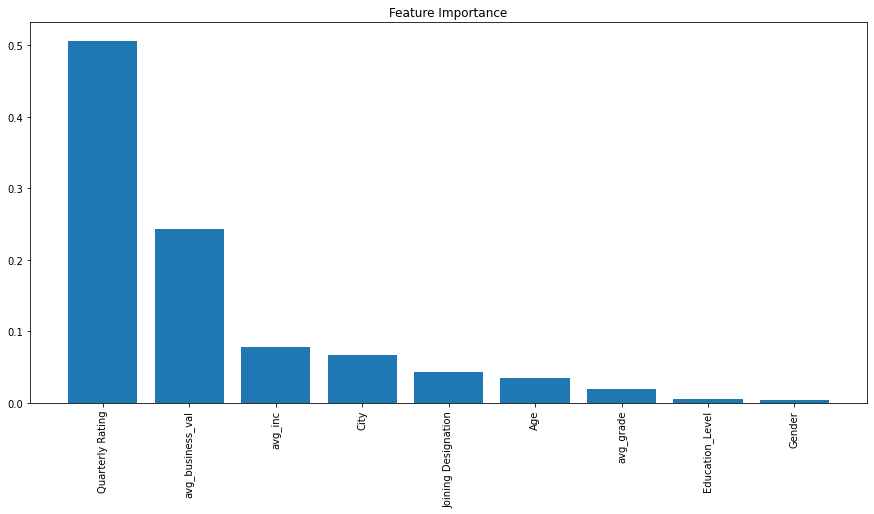

In [79]:
# Feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1] 
names = [x_train.columns[i] for i in indices] 
plt.figure(figsize=(15, 7)) 
plt.title("Feature Importance") 
plt.bar(range(x_train.shape[1]), importances[indices]) 
plt.xticks(range(x_train.shape[1]), names, rotation=90)
plt.show()

GBDTs

In [80]:
from xgboost import XGBClassifier

In [81]:
xgb=XGBClassifier(random_state=1)
fold=KFold(n_splits=5)
params={'n_estimators':[51,71,101],
        'max_depth':[4,5,7],
        'subsamples':[0.60,0.80],
        'colsample_bytree':[0.60,0.80],
        'learning_rate':[0.1,0.5,0.8]}

In [83]:
clf=RandomizedSearchCV(xgb,params,cv=fold,scoring='roc_auc',n_jobs=-1)

In [84]:
clf.fit(x_train,y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=XGBClassifier(random_state=1), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8],
                                        'learning_rate': [0.1, 0.5, 0.8],
                                        'max_depth': [4, 5, 7],
                                        'n_estimators': [51, 71, 101],
                                        'subsamples': [0.6, 0.8]},
                   scoring='roc_auc')

In [85]:
clf.best_estimator_

XGBClassifier(colsample_bytree=0.6, max_depth=7, n_estimators=51,
              random_state=1, subsamples=0.8)

In [86]:
xgb=XGBClassifier(max_depth=7,colsample_bytree=0.6,subsamples=0.8,learning_rate=0.5,n_estimators=51)
xgb.fit(x_train,y_train)
print(xgb.score(x_train,y_train))
print(xgb.score(x_test,y_test))

0.9752842313395946
0.7597765363128491


In [87]:
ypred=xgb.predict(x_test)
confusion_matrix(y_test,ypred)

array([[ 54,  55],
       [ 31, 218]])

In [88]:
print(precision_score(y_test,ypred))
print(recall_score(y_test,ypred))

0.7985347985347986
0.8755020080321285


In [89]:
y_score=xgb.predict_proba(x_test)
fpr,tpr,threshold=roc_curve(y_test,y_score[:,1])
auc(fpr,tpr)

0.7677314763641723

Insights:
1)Monthly Income for the drivers who are still working is higher than the monthly Income for the drivers who have left.Median monthly income for the drivers who have left is 51000 while the median monthly income for the drivers who are still working is 61000.
2)Almost same proportion of drivers have left at very Education level.Therefore it seems that Education level has no impact on the driver's attrition rate.
3)There are 60% male drivers and 40% female drivers.The attrition rate for both males and females is very high(around 65%).
4)Since it is an imbalanced dataset with 66% positives and 34% negatives,I have chosen AUC_ROC as the best performance metric.The area under roc curve is highest for the Random Forest Classifier(0.78).
5)The most significant features which will determine whether a driver will leave or not are Quaterly Rating,last 3 months average  business value,last 3 months average Income while the least 3 contributing features are last 3 months average grade,education level and gender.